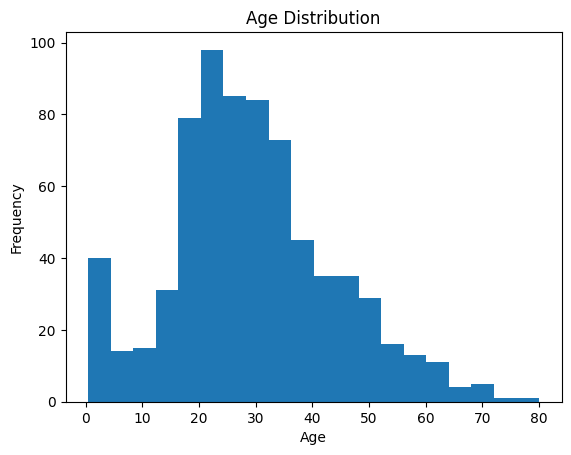

<Figure size 1000x600 with 0 Axes>

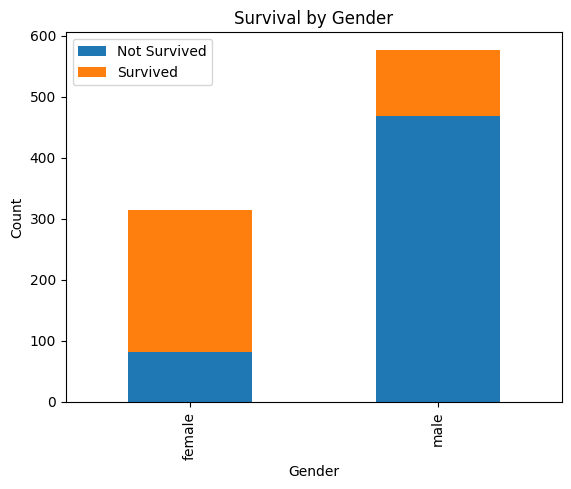

Accuracy: 79.33%

Model training has been completed and saved as titanic_model.pkl


In [15]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

#classifying into dependent and independent variables
x = df[["Pclass","Sex","Age"]]
y = df.Survived
x.isnull().sum()

#Handling Missing Values 
x.Age.fillna(x.Age.mean(),inplace=True)
x
x.isnull().sum()
y

#Visualization to show the age distribution of passangers
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize Survival by Gender
plt.figure(figsize=(10, 6))
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

#converting string to numerical
le=LabelEncoder()
gender=le.fit_transform(x.Sex)
x["Gender"]=gender
x.drop("Sex",axis=1,inplace=True)

#Splitting the data as train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

#Creating the model
model=LogisticRegression()
model.fit(train_x,train_y)

#Model Evaluation
from sklearn.metrics import accuracy_score
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)*100
print(f"Accuracy: {accuracy:.2f}%")

#Saving the model as pickle file 
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("\nModel training has been completed and saved as titanic_model.pkl")

